<a href="https://colab.research.google.com/github/seriserendipia/Airbnb_LA_Price_Prediction/blob/main/HW2_microsoft_malware_prediction__yihelu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Serializes the dataset
to deduce memory use and accerelate data reading

In [ ]:
import pandas as pd
import numpy as np

In [8]:
# %%time

# data_dir = '/scratch1/yihelu/microsoft-malware-prediction/'

# #Function to reduce file mem size
# #Based on https://www.kaggle.com/gemartin/load-data-reduce-memory-usage and https://github.com/jd12121/Microsoft-Malware-Prediction/blob/master/prepare_data.py
# def reduce_mem_usage(df, verbose=True):
#     numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
#     start_mem = df.memory_usage(deep=True).sum() / 1024**2
#     for col in df.columns:
#         col_type = df[col].dtypes
#         if col_type in numerics:
#             c_min = df[col].min()
#             c_max = df[col].max()
#             if str(col_type)[:3] == 'int':
#                 if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
#                     df[col] = df[col].astype(np.int8)
#                 elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
#                     df[col] = df[col].astype(np.int16)
#                 elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
#                     df[col] = df[col].astype(np.int32)
#                 elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
#                     df[col] = df[col].astype(np.int64)
#             else:
#                 if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
#                     df[col] = df[col].astype(np.float16)
#                 elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
#                     df[col] = df[col].astype(np.float32)
#                 else:
#                     df[col] = df[col].astype(np.float64)
#     end_mem = df.memory_usage(deep=True).sum() / 1024**2
#     if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
#     return df


# train = reduce_mem_usage(pd.read_csv(data_dir + 'train.csv',low_memory=False), verbose=False)
# test = reduce_mem_usage(pd.read_csv(data_dir +'test.csv',low_memory=False), verbose=False)

CPU times: user 5min 59s, sys: 30.3 s, total: 6min 29s
Wall time: 6min 41s


In [9]:
train_clean = data_dir + 'train_clean.pkl'
test_clean = data_dir + 'test_clean.pkl'
full_clean = data_dir + 'full_clean.pkl'

In [10]:
# %%time

# full = pd.concat([train,test],ignore_index=True,sort=False)
# full = reduce_mem_usage(full, verbose=False)

# full.to_pickle(full_clean)
# train.to_pickle(train_clean)
# test.to_pickle(test_clean)

# print('data saved')

data saved
CPU times: user 3min 40s, sys: 10.5 s, total: 3min 50s
Wall time: 3min 53s


# Read data

In [11]:
%%time
train = pd.read_pickle(train_clean)
test = pd.read_pickle(test_clean)
full = pd.read_pickle(full_clean)

CPU times: user 28.1 s, sys: 13.2 s, total: 41.3 s
Wall time: 59.9 s


# TODO
编码数值和类型
https://www.kaggle.com/competitions/microsoft-malware-prediction/discussion/84065
https://github.com/imor-de/microsoft_malware_prediction_kaggle_2nd

按时间分层抽样（5-fold

 frequency encoding
 AvSigVersion、EngineVersion、AppVersion、BuildLab

AVSigVersion 和 EngineVersion的对应和相差关系
https://chatgpt.com/c/679bcef6-eb34-8006-b8a6-1715801fc061


train is sampled from 2 consecutive months from 2018-07-25 to 2018-09-25, Public from: 2018-09-26 to 2018-10-25 and Private from: 2018-10-26 to 2018-11-25.

In [14]:
train.columns

Index(['MachineIdentifier', 'ProductName', 'EngineVersion', 'AppVersion',
       'AvSigVersion', 'IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode',
       'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier',
       'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm',
       'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier',
       'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'Platform',
       'Processor', 'OsVer', 'OsBuild', 'OsSuite', 'OsPlatformSubRelease',
       'OsBuildLab', 'SkuEdition', 'IsProtected', 'AutoSampleOptIn', 'PuaMode',
       'SMode', 'IeVerIdentifier', 'SmartScreen', 'Firewall', 'UacLuaenable',
       'Census_MDC2FormFactor', 'Census_DeviceFamily',
       'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_ProcessorClass',
       'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeName',
       'Census_

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8921483 entries, 0 to 8921482
Data columns (total 83 columns):
 #   Column                                             Dtype  
---  ------                                             -----  
 0   MachineIdentifier                                  object 
 1   ProductName                                        object 
 2   EngineVersion                                      object 
 3   AppVersion                                         object 
 4   AvSigVersion                                       object 
 5   IsBeta                                             int8   
 6   RtpStateBitfield                                   float16
 7   IsSxsPassiveMode                                   int8   
 8   DefaultBrowsersIdentifier                          float16
 9   AVProductStatesIdentifier                          float32
 10  AVProductsInstalled                                float16
 11  AVProductsEnabled                                 

# Preprocess

In [4]:
def count_by_column(df, column_name):
  """
  Groups a DataFrame by a specified column, counts occurrences, and returns percentages.
  Args:
    df: The input Pandas DataFrame.
    column_name: The name of the column to group by.
  Returns:
    A Pandas DataFrame with percentages of IDs for each group, sorted in descending order.
    Returns None if the column does not exist in the DataFrame.
  """
  if column_name not in df.columns:
    print(f"Error: Column '{column_name}' not found in DataFrame.")
    return None
  df_counts = df.groupby(column_name)['MachineIdentifier'].count().reset_index()
  df_counts.rename(columns={'MachineIdentifier': 'count'}, inplace=True)
  df_counts['percentage'] = (df_counts['count'] / df_counts['count'].sum()) * 100
  df_counts = df_counts.sort_values(by='count', ascending=False).reset_index(drop=True)
  return df_counts

count_by_column(train, 'HasDetections')


,HasDetections,count,percentage
0,1,5050,50.5
1,0,4950,49.5


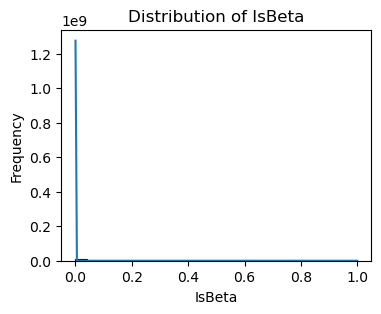

KeyboardInterrupt: 

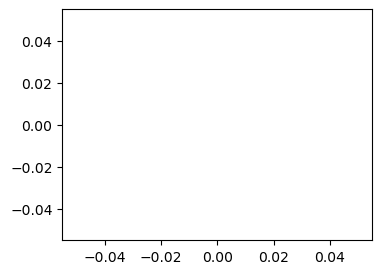

In [15]:
# prompt: for col in numerical_cols, histplot

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming numerical_cols and X_train_numerical are defined as in the previous code.

for col in train.select_dtypes(include=['number']).columns:
  plt.figure(figsize=(4, 3))  # Adjust figure size as needed
  sns.histplot(train[col], kde=True)  # Use kde=True for kernel density estimation
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()


In [16]:
count_by_column(train, 'IsBeta')

,IsBeta,count,percentage
0,0,8921416,99.999249
1,1,67,0.000751


# Train/Test split

In [5]:
train_preprocessed = train

In [6]:
# prompt: y = HasDetections,  train test split

from sklearn.model_selection import train_test_split

# Assuming 'train_numerical' is your preprocessed DataFrame and 'HasDetections' is your target variable
X = train_preprocessed.drop('HasDetections', axis=1)
y = train_preprocessed['HasDetections']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Adjust test_size and random_state as needed


In [8]:
# prompt: df train  only keep is numerical column

import pandas as pd
# Select only numerical columns
numerical_cols = train_preprocessed.select_dtypes(include=['number']).columns
# Assuming 'train' DataFrame is already loaded as in the previous code.
X_train_numerical = X_train[numerical_cols]
X_test_numerical = X_test[numerical_cols]
print(X_train_numerical.shape)
print(X_test_numerical.shape)

# Now train_numerical contains only the numerical columns from the train DataFrame.
X_train_numerical.head()

(7000, 52)
(3000, 52)


,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier
9069,0,7.0,0,NaN,53447.0,1.0,1.0,1,29,143530.0,...,556.0,63086.0,1,NaN,0.0,0,0,0.0,0.0,10.0
2603,0,7.0,0,NaN,53447.0,1.0,1.0,1,93,69926.0,...,554.0,33142.0,1,0.0,0.0,0,0,0.0,0.0,8.0
7738,0,7.0,0,1870.0,12202.0,2.0,1.0,1,199,150207.0,...,628.0,16894.0,0,0.0,0.0,0,0,0.0,0.0,11.0
1579,0,7.0,0,NaN,53447.0,1.0,1.0,1,159,97390.0,...,355.0,20317.0,0,0.0,0.0,0,0,0.0,1.0,11.0
5058,0,7.0,0,NaN,7945.0,2.0,1.0,1,110,3137.0,...,628.0,19270.0,1,NaN,0.0,0,0,0.0,0.0,3.0


In [ ]:
# Select only numerical columns
numerical_cols = train_preprocessed.select_dtypes(include=['number']).columns

# Classification Model

In [ ]:
# prompt: llightgbm

!pip install lightgbm

import lightgbm as lgb

# Create LightGBM dataset
lgb_train = lgb.Dataset(X_train_numerical, y_train)
lgb_eval = lgb.Dataset(X_test_numerical, y_test, reference=lgb_train)

# Define LightGBM parameters
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Train the LightGBM model
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=lgb_eval,
                early_stopping_rounds=10)


# Make predictions on the test set
y_pred_lgb = gbm.predict(X_test_numerical, num_iteration=gbm.best_iteration)
y_pred_lgb_binary = [1 if p > 0.5 else 0 for p in y_pred_lgb]


# Evaluate the model
accuracy_lgb = accuracy_score(y_test, y_pred_lgb_binary)
roc_auc_lgb = roc_auc_score(y_test, y_pred_lgb)

print(f"LightGBM Accuracy: {accuracy_lgb}")
print(f"LightGBM ROC AUC: {roc_auc_lgb}")


In [ ]:
# prompt: a)	Logistics Regression
# b)	Random Forest
# c)	Decision Tree
# d)	SVM
# e)	KNN
# f)	ANN
# evaluated on area under the ROC curve,a)	Report the confusion matrix, accuracy score, precision score, recall score, f1 score

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


# ... (Your existing code) ...


# Classification Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),  # Increased max_iter
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(probability=True), # Enable probability estimates for ROC AUC
    'KNN': KNeighborsClassifier(),
    'ANN': MLPClassifier()
}

results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_numerical, y_train)
    y_pred = model.predict(X_test_numerical)
    y_prob = model.predict_proba(X_test_numerical)[:, 1] # Probability for positive class

    results[name] = {
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_prob)
    }
    print(f"{name} trained.")


for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"  Confusion Matrix:\n{metrics['confusion_matrix']}")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  Precision: {metrics['precision']:.4f}")
    print(f"  Recall: {metrics['recall']:.4f}")
    print(f"  F1-score: {metrics['f1']:.4f}")
    print(f"  ROC AUC: {metrics['roc_auc']:.4f}")


# Predict test dataset and submit to Kaggle